# 🚀 Exploring Web Scraping with BeautifulSoup in Python 🌐🐍

### Case Study: Top 100 SME UK Business by [EliteBusiness](https://elitebusinessmagazine.co.uk/eb100-winners)
BeautifulSoup is an intuitive and powerful Python library that simplifies the process of parsing and navigating HTML or XML documents. Here’s why it stands out:

- 🔍 Easy to Use.

- ⚡ Fast & Efficient.

- 🌐 Works with Different Parsers.

- 💪 Robust Features.


Our example is finding and storing efficiently in a csv file, all the relevant information from the [website:](https://elitebusinessmagazine.co.uk/eb100-winners)
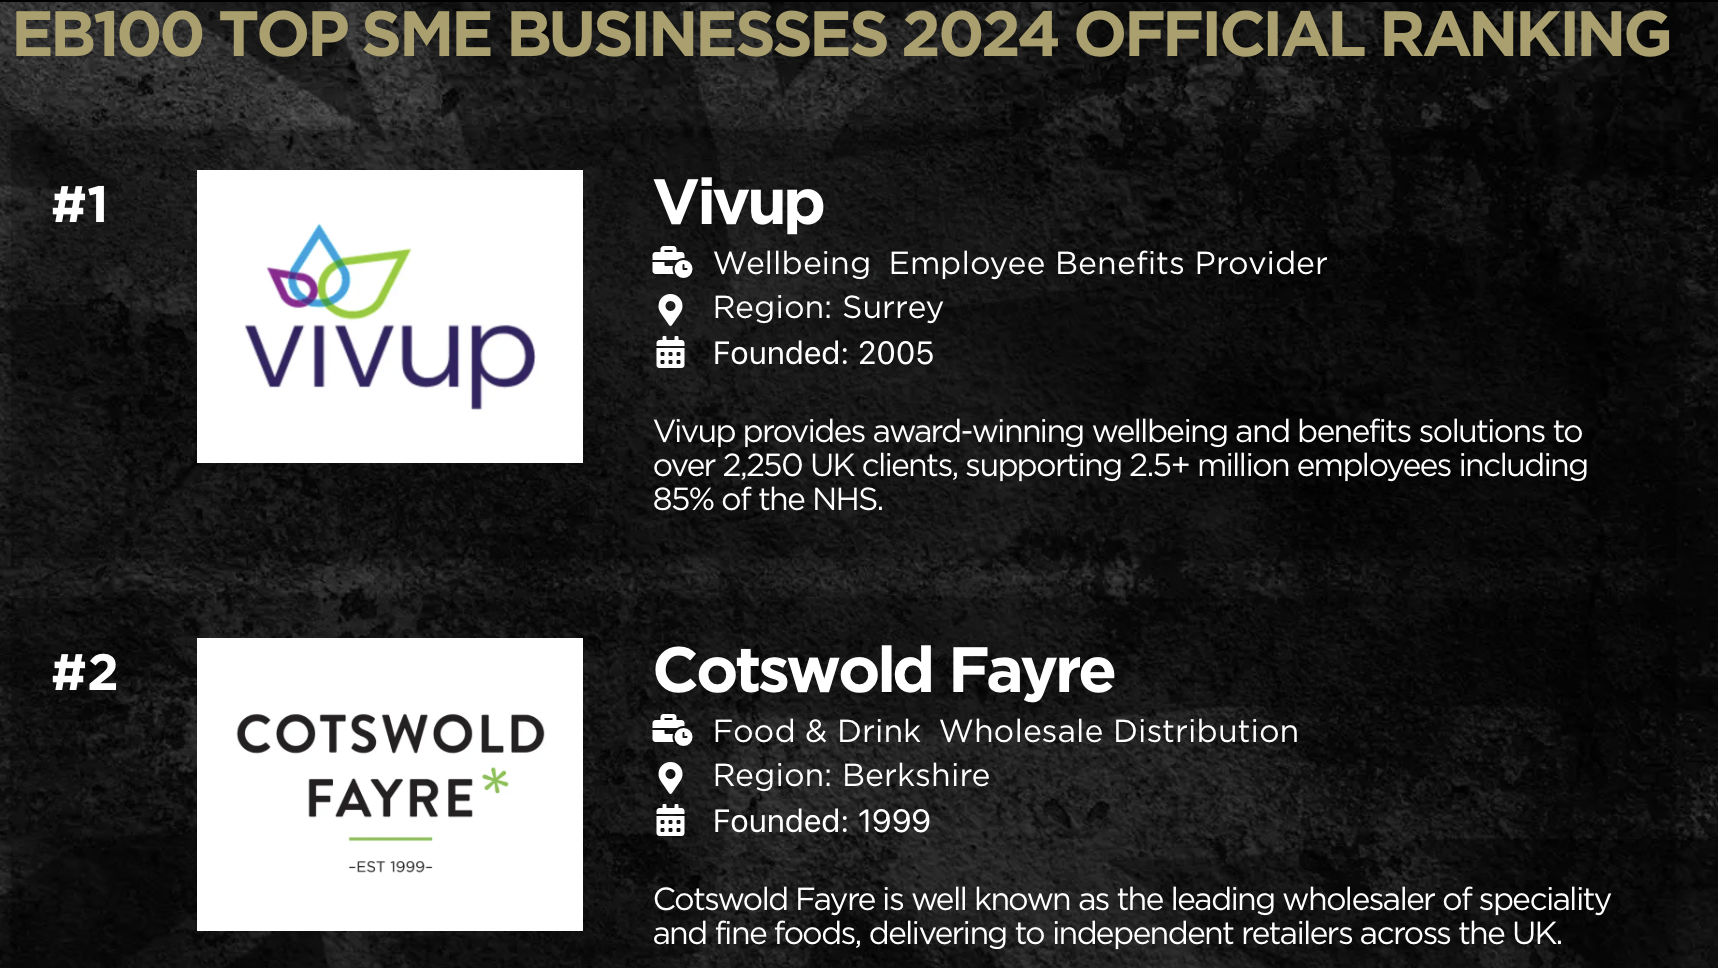

More precisely, we are interested in obtaining the following features: <b> Order</b>, <b> Name</b>,	<b> Region</b>,	<b> Founded</b>,	<b> Description</b> and	<b>Sectors </b>.





The following piece of code is to install the packages. Uncomment and run it, if needed.

In [1]:
#%pip install pandas bs4

These are the packages we need.

In [2]:
from bs4 import BeautifulSoup
import pandas as pd

This is the piece of html of the website that contains all the data we are looking for is stored in the file "html_content.rtf".

In [3]:
# Open and read the .html file
with open('html_content.rtf', 'r', encoding='utf-8') as file:
    html_content = file.read()


This is the piece of the code where we locate the information through their tags. We follow with simple programming logic to classify these features.

In [4]:
# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Initialize a list to store the rows (Order, Name, Region, Founded and Description)
rows = []
current_row = {}

# Find all div elements with the class 'jet-listing-dynamic-field__content' (these contains the previous characteristics)
content_elements = soup.find_all('div', class_='jet-listing-dynamic-field__content')

i = 0
# Loop through each found element and extract the text
for content_element in content_elements:
    # Extract the text from the div
    content_text = content_element.get_text(strip=True)

    # Check if the content starts with '#' (a new row identifier)
    if content_text.startswith("#"):
        # If a row is already being processed, save it and reset the row
        if current_row:
            rows.append(current_row)
            current_row = {}
        
        # Treat it as the name
        current_row['Order'] = content_text
    
    # Check if the content starts with 'Region'
    elif content_text.lower().startswith("region"):
        current_row['Region'] = content_text.split(":")[1].strip() # To keep only the name of the region
    
    # Check if the content starts with 'Founded'
    elif content_text.lower().startswith("founded"):
        current_row['Founded'] = content_text.split(":")[1].strip() # To save only the foundation year
    
    else:
        if i % 2 == 0:
            i = i+1
            current_row['Name'] = content_text

        # Otherwise, treat it as a description or other value
        else:
            i =i+1
            current_row['Description'] = content_text

# After the loop, if there's any remaining data in current_row, add it to rows
if current_row:
    rows.append(current_row)

# Convert the rows into a pandas DataFrame
df = pd.DataFrame(rows)

# We just need to find the sectors
data = []
# Find all sections that are populated
sections = soup.find_all('div', class_='elementor-widget-wrap elementor-element-populated')

i = 0
# Loop through each section to extract relevant information
for section in sections:
    i += 1
    if i%2 ==0:
        # Initialize a dictionary to store extracted sectores
        section_data = {}

        # Extract Sectors (if any): Find 'jet-listing-dynamic-terms' and get the links
        sectors_element = section.find('div', class_='jet-listing-dynamic-terms')
        if sectors_element:
            sectors = [span.text.strip() for span in sectors_element.find_all('span', class_='jet-listing-dynamic-terms__link')]
            section_data['Sectors'] = '; '.join(sectors)

        # Add the section data if it contains any meaningful extracted sectors
        if any(section_data.values()):
            data.append(section_data)

# Create a pandas DataFrame
df2 = pd.DataFrame(data)

df= pd.concat([df, df2], axis=1)

# Finally, we could save the DataFrame to a CSV file
#csv_file = 'EB100_2024.csv'
#df.to_csv(csv_file, index=False)

We just show next that we could retrieve all the data. There are only two NaN values, which are from the region variable and are not available from the website.

In [5]:
df

,Order,Name,Region,Founded,Description,Sectors
0,#1,Vivup,Surrey,2005,Vivup provides award-winning wellbeing and ben...,Wellbeing; Employee Benefits Provider
1,#2,Cotswold Fayre,Berkshire,1999,Cotswold Fayre is well known as the leading wh...,Food & Drink; Wholesale Distribution
2,#3,myenergi,Lincolnshire,2016,myenergi is one of the world\'92s fastest-grow...,Envirotech Solutions; Energy; Technology
3,#4,Furniturebox,Wiltshire,2015,Furniturebox is an online furniture company la...,Furniture; eCommerce
4,#5,MLabs,Bedfordshire,2018,"At MLabs, our vision is building a uniquely 10...",Technology
...,...,...,...,...,...,...
95,#96,HAD & CO,Manchester,2017,HAD & CO work on both residential and commerci...,Property Design
96,#97,The Go-To,NaN,2022,"With the launch of The Go-To, Victoire has cre...",eCommerce
97,#98,Music Workflow Academy,Hertfordshire,2021,Music Workflow Academy provides a range of ser...,Music; Education
98,#99,KZ Organics,West Midlands,2021,"At KZ Organics, our mission is to redefine ski...",Health; Beauty
